# In-Class Assignment: Titanic dataset
### Passenger Information

- passengerid: A unique identifier for each passenger
- name: The full name of the passenger
- sex: Gender of the passenger (male/female)
- age: Age in years (some values are missing)
- sibsp: Number of siblings/spouses aboard the Titanic
- parch: Number of parents/children aboard the Titanic
### Ticket & Fare Details

- ticket: Ticket number
- fare: The ticket price paid
- pclass: The passenger class (1st, 2nd, 3rd class), a proxy for socio-economic status
### Survival & Location Details

- survived: Whether the passenger survived (1) or not (0)
- embark_town: The port where the passenger boarded (Southampton, Cherbourg, Queenstown)
- embarked: Coded version of embark_town (S, C, Q)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Display the first five rows
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Question 1: Understanding the dataset. Is there any missing value?
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
# Dropping 'deck' column due to high missing values
titanic = titanic.drop(columns=['deck'])

In [5]:
# Imputing missing values
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0],inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
print('Imputing missing values after')
print(titanic.isnull().sum())

Imputing missing values after
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


C:\Users\samue\AppData\Local\Temp\ipykernel_45692\2403422428.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_45692\2403422428.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [6]:
# Question 2: Checking for duplicate rows and drop duplicate rows
titanic=titanic.drop_duplicates()

In [7]:
titanic.duplicated().sum()

0

In [8]:
# Question 3: Average age of passengers
avg_age = titanic['age'].mean()
print('The Average age of the passengers is',avg_age)

The Average age of the passengers is 29.58118709677419


### Visualization: Age distribution using histogram (sns.histplot)
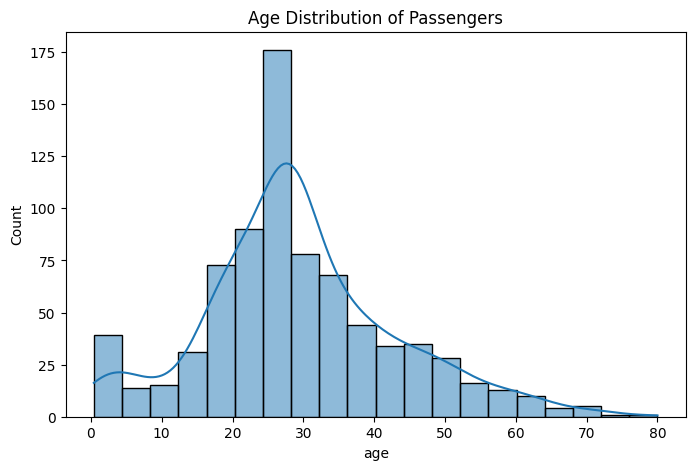

<function matplotlib.pyplot.show(close=None, block=None)>

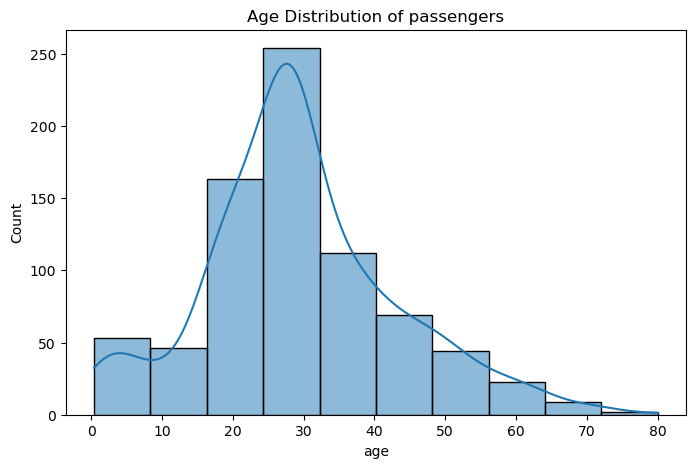

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(titanic['age'], bins=10, kde=True)
plt.title('Age Distribution of passengers')
plt.show

In [11]:
# Question 5: Find out Survival percentage
survival_rate=titanic['survived'].mean() * 100
print(f'Survival percentage: {survival_rate:.2f}%')

Survival percentage: 41.29%


### Visualization: Survival count using bar plor
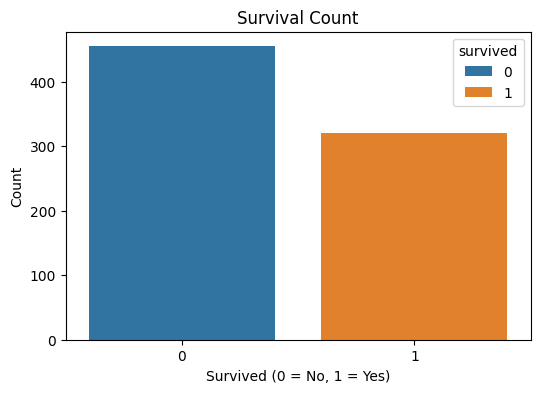

Text(0, 0.5, 'Count')

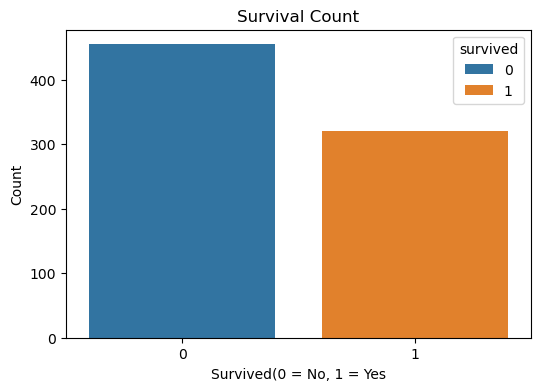

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data= titanic, x='survived',hue='survived')
plt.title('Survival Count')
plt.xlabel('Survived(0 = No, 1 = Yes')
plt.ylabel('Count')

In [14]:
# Question 6: Find out Male to female ratio
male_female_ratio = titanic['sex'].value_counts()
print('Male to Female ratio:\n', male_female_ratio)

Male to Female ratio:
 sex
male      483
female    292
Name: count, dtype: int64


### Visualization: Gender count in bar plot
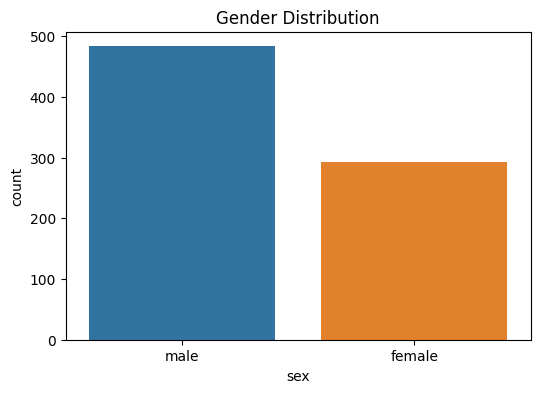


Text(0.5, 1.0, 'Gender Distribution')

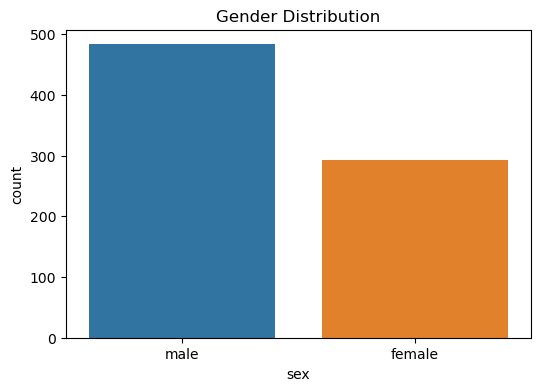

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=titanic, x='sex', hue='sex')
plt.title('Gender Distribution')

In [17]:
# Question 7: Find out Average fare per pclass
fare_by_class = titanic.groupby('pclass')['fare'].mean()
print('Average fair paid by passanger class:\n', fare_by_class)

Average fair paid by passanger class:
 pclass
1    85.675199
2    21.889279
3    13.588850
Name: fare, dtype: float64


### Visualization: Fare distribution per class using box plot sns.boxplot
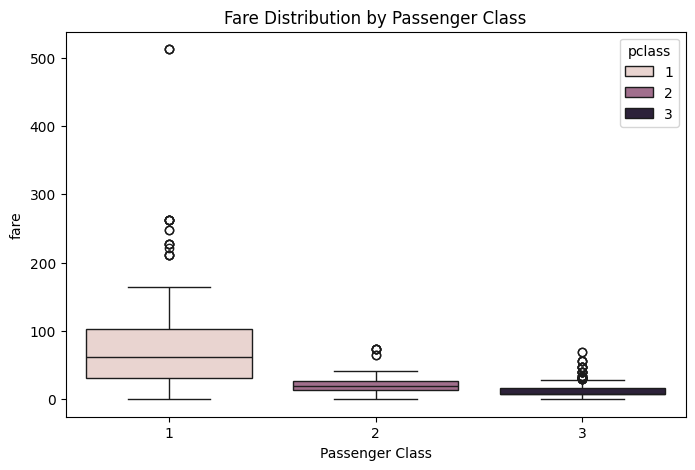

Text(0, 0.5, 'fare')

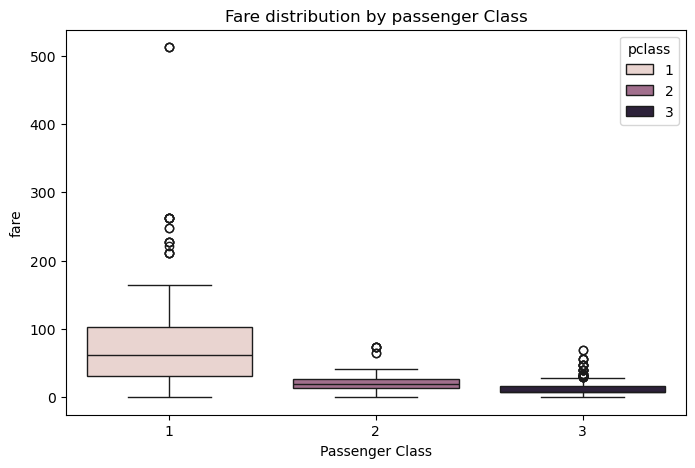

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(data=titanic, x='pclass', y='fare', hue='pclass')
plt.title('Fare distribution by passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('fare')

In [20]:
# Question 8: Survival rate across passenger classes
survivalbyclass=titanic.groupby('pclass')['survived'].mean() * 100
print('Survival rate by passanger class:\n', survivalbyclass)

Survival rate by passanger class:
 pclass
1    63.333333
2    50.609756
3    25.935162
Name: survived, dtype: float64


### Visualization: Survival by class
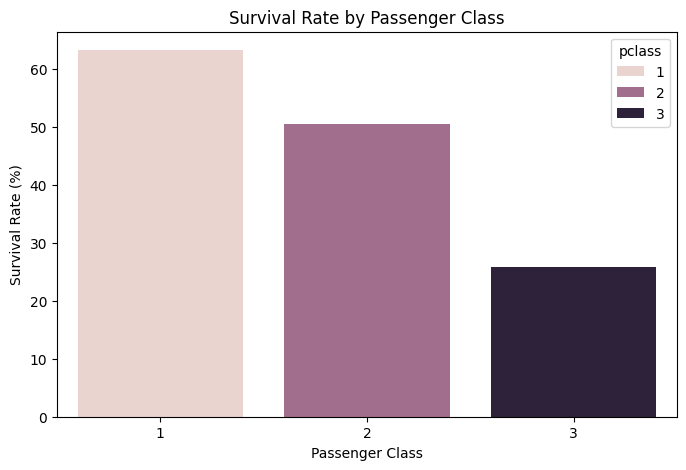

Text(0, 0.5, 'Survival Rate(%)')

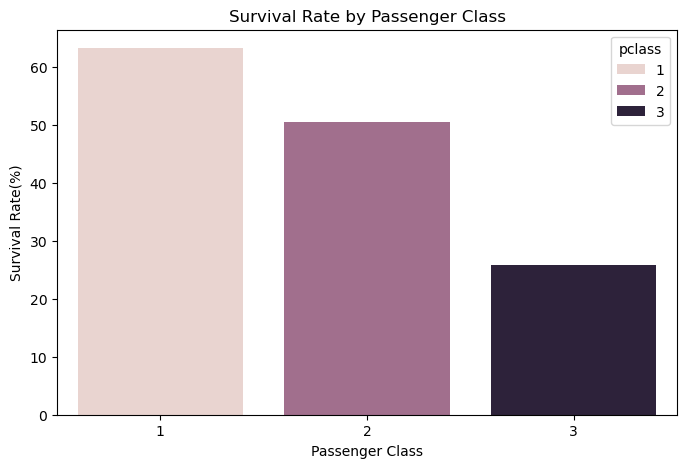

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x=survivalbyclass.index, y=survivalbyclass.values, hue=survivalbyclass.index)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate(%)')

In [23]:
# Question 9: Survival rate by age groups using condition statement. If age less than 18 Children, <60 adult and else senior
def age_category(age):
    if age < 18:
        return'Childern'
    elif age < 60:
        return 'Adults'
    else:
        return 'Seniors'

In [24]:
titanic['age_group'] = titanic ['age'].apply(age_category)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Adults
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Adults
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Adults
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Adults
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Adults


In [48]:
age_survival = titanic.groupby('age_group')['survived'].mean() * 100
print('Survival rate by age group:\n', age_survival)

Survival rate by age group:
 age_group
Adults      39.531250
Childern    54.545455
Seniors     28.000000
Name: survived, dtype: float64


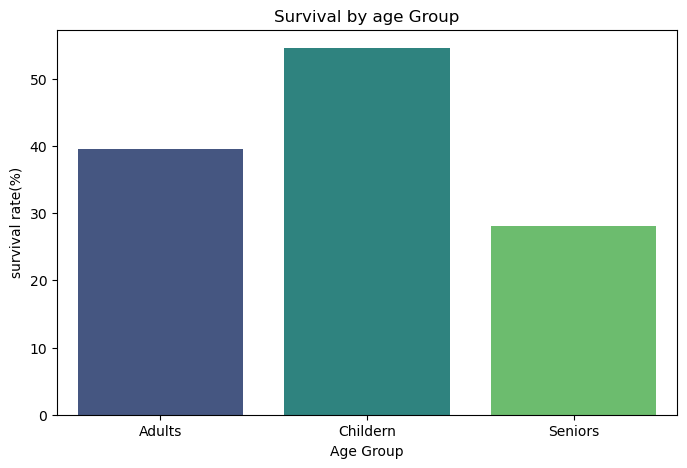

In [54]:
plt.figure(figsize=(8,5))
sns.barplot(x=age_survival.index, y=age_survival.values, hue=age_survival.index, palette='viridis')
plt.title('Survival by age Group')
plt.xlabel('Age Group')
plt.ylabel('survival rate(%)')
plt.show()

### Visualization: Survival by age group
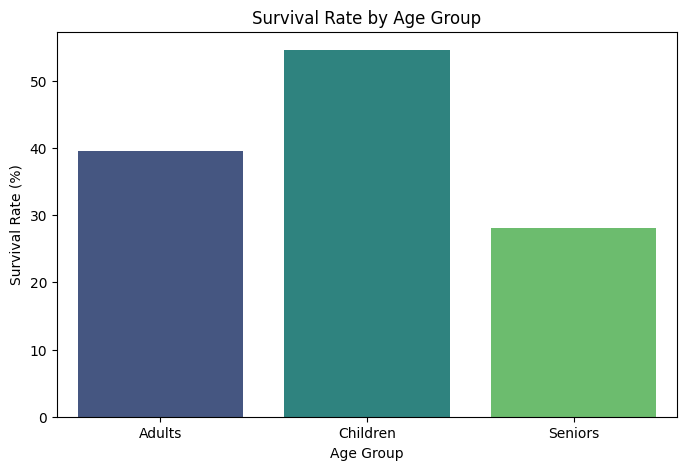

In [56]:
# Question 10: Survival rate by embarkation port
survival_by_embark = titanic.groupby('embark_town')['survived'].mean() *100
print('Survival rate by emarkation port:\n', survival_by_embark)



Survival rate by emarkation port:
 embark_town
Cherbourg      58.064516
Queenstown     34.482759
Southampton    37.366548
Name: survived, dtype: float64


### Visualization: Survival by embarkation port
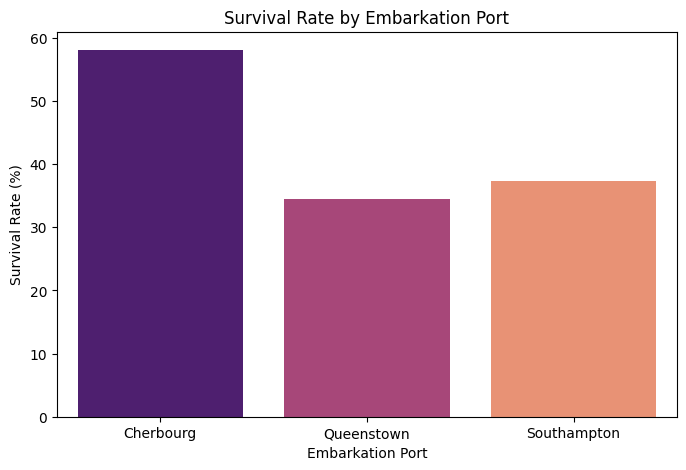

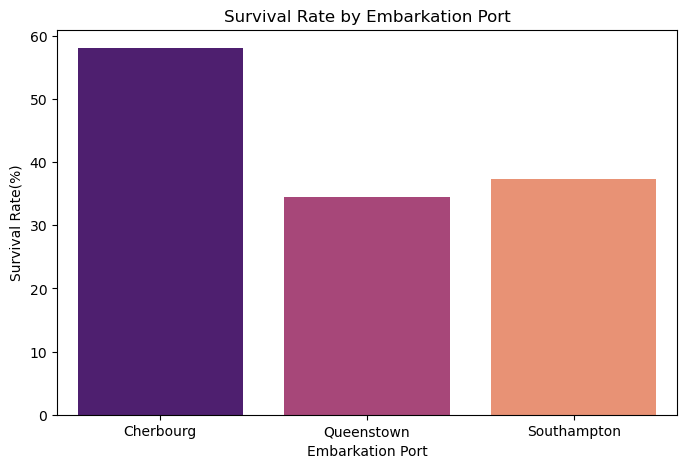

In [58]:
plt.figure(figsize=(8,5))
sns.barplot(x=survival_by_embark.index, y= survival_by_embark.values, hue=survival_by_embark.index, palette='magma')
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate(%)')
plt.show()